# Investigation of different parameterizations of w(x)
In this notebook I investigate the inpact different parametrizations has on w(x) presented by Peters et al. (2020)

\begin{align}
w(x) &= \frac{\hat{p}(x) + \varepsilon[\hat{p}(x)]}{\int_{-\infty}^\infty \hat{p}(s) + \varepsilon[\hat{p}(s)] ds}  \\ \\
     &  = \frac{\frac{n(x)}{T} + \sqrt{\frac{n(x)}{T^2}}}{\int_{-\infty}^\infty \frac{n(s)}{T} + \sqrt{\frac{n(s)}{T^2}} ds}
\end{align}

I investigate multiple different parameterizations, but would like to end up with one that (as CPT) has two parameters: 
- a sensitivity parameter; and 
- a elevation parameter

In [1]:
# %matplotlib notebook
# from ipywidgets import *
import math
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def we(n,T,par="none", delta=1,gamma=1):
    n2 = T-n
    if par=="1":
        n = n*delta
        n2 = n2*delta
    elif par=="2":
        n=n*delta
        n2=n2*delta
        T=T*gamma
    #Estimating w for outcome 
    p =  n/T
    error = math.sqrt(p/T)
    
    if par=="3":
        p = p*delta
        error = error*gamma
    
    w = p+error
    
    #Estimating w for 1-outcome
    p2 = n2/T
    error2 = math.sqrt(p2/T)
    
    if par=="3":
        p2 = p2*delta
        error2 = error2*gamma
    
    w2 = p2 + error2
    
    #Normalizing
    w_norm = w/(w+w2)
    w2_norm = w2/(w+w2)
    print(w_norm)
    print(w2_norm)

    return w_norm, p

0.0
1.0
-0.11909309449683965
1.1190930944968396
-0.003866846887247477
1.0038668468872474
0.17551642876111725
0.8244835712388827
0.3882778981095924
0.6117221018904075
0.6117221018904075
0.3882778981095924
0.8244835712388827
0.17551642876111723
1.0038668468872476
-0.003866846887247554
1.1190930944968396
-0.11909309449683969
1.0
0.0


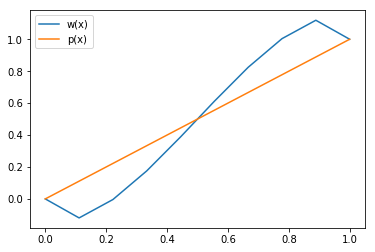

In [44]:
T = 10
N = 10
delta = 1
x = np.linspace(0,T,N)
x1 = np.linspace(0,1,N)
weight = []
p = []
for n in x:
    w_tmp, p_tmp = we(n,T,par="3", delta=1, gamma=-1.5)
    weight.append(w_tmp)
    p.append(p_tmp)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x1, weight, label='w(x)')
line, = ax.plot(x1, x1, label='p(x)')
ax.legend()
plt.show()

In [26]:
weight

[0.0,
 0.19526214587563498,
 0.2947437085514174,
 0.38042684413094985,
 0.46065533708336837,
 0.5393446629166316,
 0.6195731558690502,
 0.7052562914485825,
 0.804737854124365,
 1.0]

In [28]:
weight

[0.0,
 0.18769982433812873,
 0.28842159384092136,
 0.37638496736923394,
 0.45927360170508624,
 0.5407263982949136,
 0.6236150326307661,
 0.7115784061590785,
 0.8123001756618712,
 1.0]

In [30]:
weight

[0.0,
 0.20768986700327588,
 0.30505275472146876,
 0.38699213417696554,
 0.46289590834552896,
 0.537104091654471,
 0.6130078658230345,
 0.6949472452785311,
 0.792310132996724,
 1.0]